# **Uber Data Analysis With Python**

**Uber Technologies, Inc.** (commonly referred to as **Uber**) provides ride-hailing services, food delivery, and freight transport. It is headquartered in San Francisco and operates in approximately 70 countries and 10,500 cities worldwide. The company has over 131 million monthly active users and 6 million active drivers and couriers worldwide and facilitates an average of 25 million trips per day. It has facilitated 42 billion trips since its inception in 2010 and is the largest ridesharing company in the United States.

I will ask these questions during analysis:

* How many Categories do we have?
* Check how long do people travel with Uber?
* What Hour Do Most People Take Uber To Their Destination?
* Check The Purpose Of Trips
* Which Day Has The Highest Number Of Trips
* What Are The Number Of Trips Per Each Day?
* What Are The Trips In The Month?

# Import The Necessary Libraries

In [55]:
# Importing libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [56]:
# Reading csv file

df = pd.read_csv('Uber Drives.csv')

df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


## Data Exploration and Data Cleaning

<span style="font-size: 18px;">Checking for Mising Values</span></br>
Let's check below if there is any missing values.

In [57]:
# Checking missing values

df.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [58]:
# Counting the missing values

df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

Look's like there is some null values in our dataset. Let's clear those.

In [59]:
# Dropping all Null values

df = df.dropna()

In [60]:
# Checking missing values

df.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

Now, we can see that there are no missing values in the dataset. However, removing missing values is not always the best approach for analysis. In this case, null values were present in categorical columns, which is why I removed them.

In [61]:
# Changing datatype

df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format = '%m/%d/%Y %H:%M')
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format = '%m/%d/%Y %H:%M')

In [44]:
# Again, checking datatype

df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

Changing datatypes of 'START_DATE' and 'END_DATE' from object to datetime64.

In [63]:
# Extracting some features

hour = []
day = []
month = []
weekday = []
dayofweek = []

for x in df['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    month.append(x.month)
    dayofweek.append(x.dayofweek)
    weekday.append(calendar.day_name[dayofweek[-1]])
    
df['HOUR'] = hour
df['DAY'] = day
df['MONTH'] = month
df['WEEKDAY'] = weekday
df['DAY OF WEEK'] = dayofweek

In [65]:
# Printing first 5 values

df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,MONTH,WEEKDAY,DAY OF WEEK
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,4
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,Wednesday,2
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,Wednesday,2


I extracted 'Hour', 'Day', 'Month', 'Weekday' and 'Day of week' from 'Start_date*' for further analysis.

### How many Category do we have?

In [69]:
# Counting unique values

df['CATEGORY*'].value_counts()

CATEGORY*
Business    647
Personal      6
Name: count, dtype: int64

<Axes: xlabel='CATEGORY*', ylabel='count'>

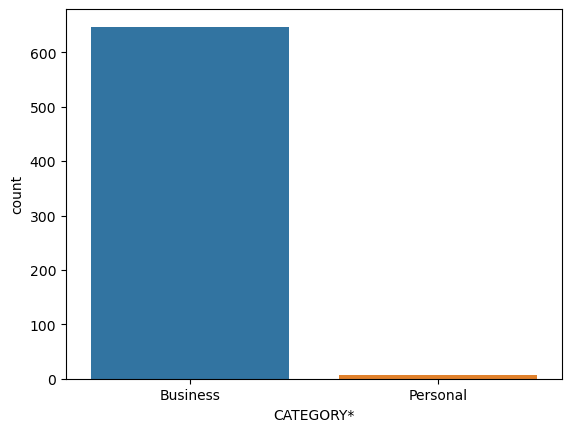

In [67]:
# Bar Plot for 'CATEGORY'

sns.countplot(x="CATEGORY*", data = df)

We have huge amount of business rides than personal rides.</br>
**Idea:** Uber can provides membership for those customers who are connected with business.

### **How long do people travel with Uber?**

<Axes: ylabel='Frequency'>

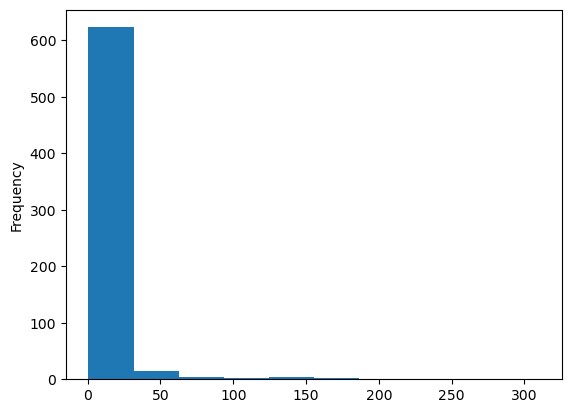

In [71]:
# Bar Plot for 'MILES'

df['MILES*'].plot.hist()

Interestingly, Uber customer takes rides only for short miles.</br>
**Idea:** To attract more, Uber can give some discounts or coupons for short distance travelers.

### **What Hour Do Most People Take Uber To Their Destination?**

Text(0.5, 1.0, 'Number of Trip vs Hours')

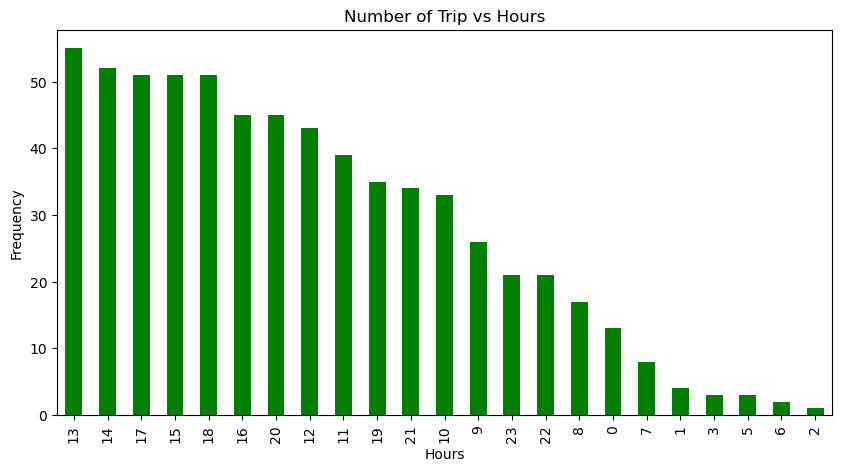

In [73]:
# Bar Plot of Hours to reach destination

hours = df['START_DATE*'].dt.hour.value_counts()

hours.plot(kind='bar', color='green', figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of Trip vs Hours')

As we can see most people take Uber at around 13 (1 PM) and least hour is 2 AM. </br>
**Idea**: Uber can do their marketing between 13 to 18 time, because most of users are using their application around this time line.

### **Check The Purpose Of Trips**

<Axes: xlabel='PURPOSE*'>

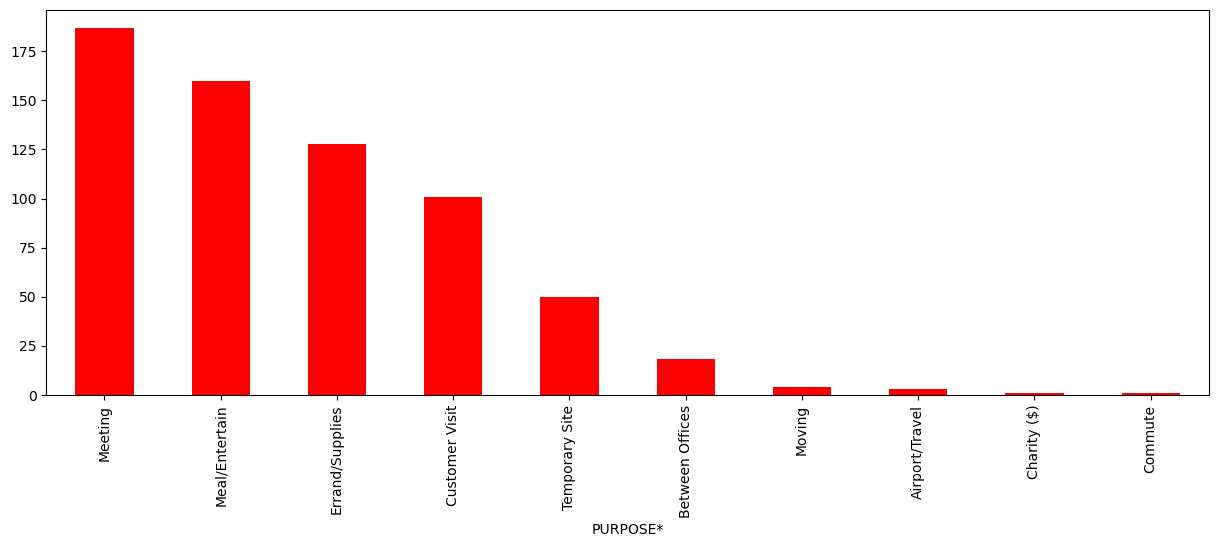

In [75]:
# Plot for 'Purpose' category

df['PURPOSE*'].value_counts().plot(kind='bar',figsize=(15,5), color="red")

We can notice that most of purpose of rides are Meeting and Meal/Entertain.</br>
**Idea:** My suggestion is that Uber drivers should stay near meeting halls or entertainment spots, such as movie theaters or parks, because by staying nearby, they can attract more customers. If Uber drivers earn more, the company will also receive higher commissions.

### **Which Day Has The Highest Number Of Trips**

<Axes: xlabel='WEEKDAY'>

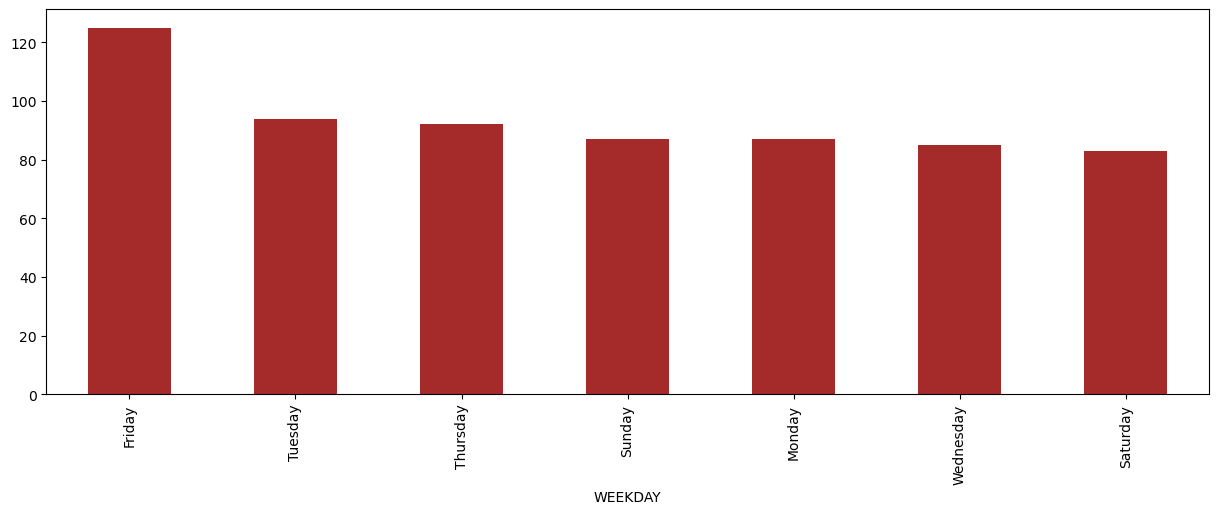

In [77]:
# Plot for Weekday category 

df['WEEKDAY'].value_counts().plot(kind='bar', figsize=(15,5), color='brown')

Friday has the highest number of custmore, which is nearly 120.</br>
**Idea:** Maybe due to holiday, most of people likes to ride on Friday. Uber can suggest some discount code on that day.

### **What Are The Number Of Trips Per Each Day?**

<Axes: xlabel='DAY'>

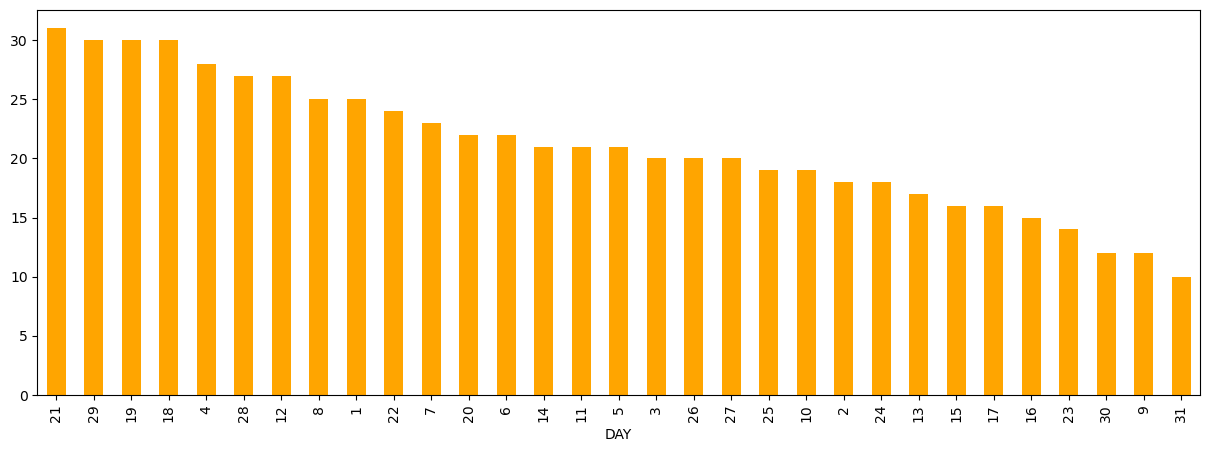

In [78]:
# Plot for Day

df['DAY'].value_counts().plot(kind='bar', figsize=(15,5), color='orange')

As we can see, most people prefer to travel on particular dates, such as the 21st, 29th, 19th, and 18th. There could be many reasons, such as it being a Friday.</br> **Idea:** Uber can improve its marketing strategies on these days since there is a lot of crowd.

### **What Are The Trips In The Month**

<Axes: xlabel='MONTH'>

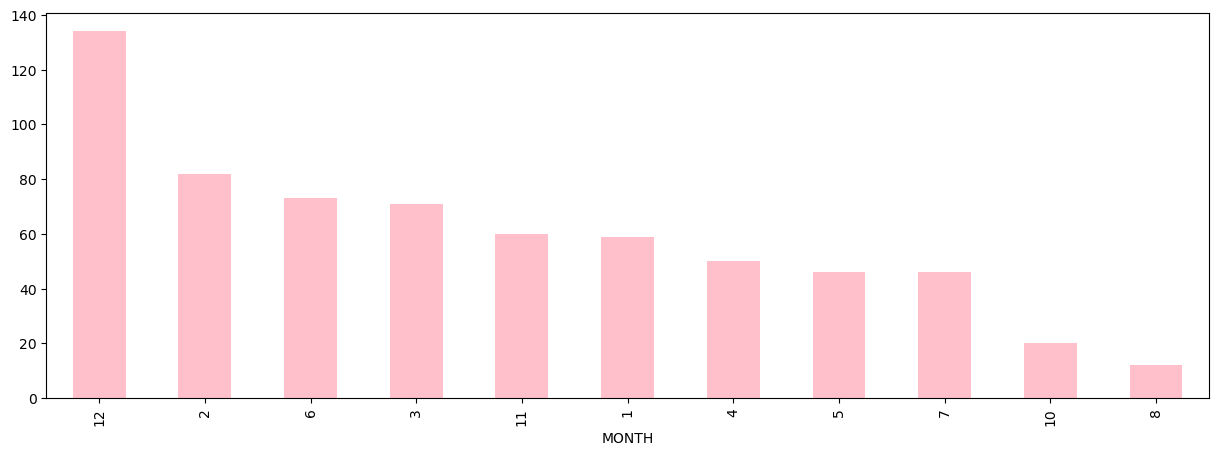

In [82]:
# Plot for Month

df['MONTH'].value_counts().plot(kind='bar', figsize=(15,5), color='pink')

By looking at the graph, December month is most popular month among Uber customers, maybe becuase of Christmas Holidays. However, Augest has the least rides. </br> **Idea:** Uber should less focus on months like Octomer or Augest for their marketing. 